# 밑바닥 부터 시작하는 딥러닝

## 목차
```
4.1 데이터에서 학습한다! 
__4.1.1 데이터 주도 학습 
__4.1.2 훈련 데이터와 시험 데이터 
4.2 손실 함수 
__4.2.1 평균 제곱 오차 
__4.2.2 교차 엔트로피 오차 
__4.2.3 미니배치 학습 
__4.2.4 (배치용) 교차 엔트로피 오차 구현하기 
__4.2.5 왜 손실 함수를 설정하는가? 
4.3 수치 미분 
__4.3.1 미분 
__4.3.2 수치 미분의 예 
__4.3.3 편미분 
4.4 기울기 
__4.4.1 경사법(경사 하강법) 
__4.4.2 신경망에서의 기울기 
4.5 학습 알고리즘 구현하기 
__4.5.1 2층 신경망 클래스 구현하기
__4.5.2 미니배치 학습 구현하기 
__4.5.3 시험 데이터로 평가하기
```
---

# Chapter 4: 신경망 학습

- **학습:** 훈련 데이터로부터 가중치 매개변수의 최적값을 자동을 획득하는 것
- 학습 지표: 손실 함수(결과값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 목표)
- 손실 함수의 값을 가급적 작게 만드는 기법 → 함수의 기울기를 활용하는 경사법

## 4.1 데이터에서 학습한다!

- 데이터를 보고 학습 == 가중치 매개변수의 값을 데이터를 보고 자동으로 결정한다
- 신경망 학습 -> 데이터로부터 매개변수의 값을 정하는 방법

### 4.1.1 데이터 주도 학습

- 기계학습: 사람의 개입 최소화, 수집한 **데이터**로부터 패턴을 찾으려 시도
    - 이미지 데이터 → 벡터 → 분류기법을 활용해 학습
    - 모아진 데이터로 규칙을 찾아내는 역할: '기계' but 이미지를 벡터로 변환할 때 사용하는 **특징(feature)**은 여전히 ‘사람’이 설계
- 신경망: 이미지를 ‘있는 그대로’ 학습, end-to-end machine learning
    - 이미지에 포함된 중요한 특징까지도 ‘기계’가 스스로 학습
    - 이점: 모든 문제를 같은 맥락에서 풀 수 있다

- 규칙을 '사람'이 만드는 방식에서 '기계'가 데이터로부터 배우는 방식으로 패러다임 전환: 회색 블록은 사람이 개입하지 않음을 뜻한다.

    <img src = "deep_learning_images/fig 4-2.png" width = "50%" height = "50%" >

### 4.1.2 훈련 데이터와 시험 데이터

- 훈련 데이터만 사용하여 학습 → 최적의 매개변수 찾기 → 시험 데이터를 사용하여 앞서 훈련한 모델의 실력 평가
- **범용능력:** 아직 보지 못한 데이터(훈련 데이터에 포함되지 않는 데이터)로도 문제를 올바르게 풀어내는 능력(최종목표)
- **오버피팅(overfitting):** 한 데이터셋에만 지나치게 최적화된 상태(과적합, 과대적합, 과적응), 편견이 생긴 상태

## 4.2 손실 함수

- 신경망 학습: 현재의 상태를 ‘하나의 지표’로 표현
- ‘하나의 지표’를 기준으로 최적의 매개변수 값을 탐색
- **지표 → 손실함수(loss function):**
    - 오차제곱합(Sum of Squares for Error, SSE)
    - 교차 엔트로피 오차(Cross Entropy Error, CEE) 사용
    
> '손실 함수'는 신경망 성능의 '나쁨'을 나타내는 지표, '나쁨을 최소로 하는 것'과 '좋음을 최대로 하는 것'

### 4.2.1 오차제곱합

- 오차제곱합(Sum of Squares for Error, SSE): 가장 많이 쓰이는 손실 함수

    <img src = "deep_learning_images/e 4.1.png" width = "30%" height = "30%" >

- y_k: 신경망의 출력(신경망이 추정한 값)
- t_k: 정답 레이블
- k: 데이터의 차원 수

In [1]:
import numpy as np
# 원소 10개 짜리
# 첫 번째 인덱스 부터 '0', '1', '2' ...

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # 소프트맥스 함수의 출력 -> 확률로 해석
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 원-핫 인코딩(정답 '2')

In [2]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [3]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답 2

In [4]:
# 예1: 2일 확률이 가장 높다고 추정(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] 
print(sum_squares_error(np.array(y), np.array(t))) 

0.09750000000000003


In [5]:
# 예2: 7일 확률이 가장 높다(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] 
print(sum_squares_error(np.array(y), np.array(t))) 

0.5975


- 예1의 손실 함수 쪽 출력이 작다 -> 정답 레이블과의 오차도 작다
- 즉, 오차제곱합 기준으로는 첫 번째 추정 결과가(오차가 더 작으니) 정답에 더 가까울 것으로 판단

### 4.2.2 교차 엔트로피 오차

- 오차제곱합(Sum of Squares for Error, SSE): 가장 많이 쓰이는 손실 함수

    <img src = "deep_learning_images/e 4.2.png" width = "30%" height = "30%" >

- y_k: 신경망의 출력
- t_k: 정답 레이블(원-핫 인코딩)
- 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 된다
    - 정답 레이블 '2', 신경망 출력 0.6 -> 교차 엔트로피 오차: -log0.6 = 0.51
    - 정답 레이블 '2', 신경망 출력 0.1 -> 교차 엔트로피 오차: -log0.1 = 2.30
    - 정답 레이블 '2', 신경망 출력 1.0 -> 교차 엔트로피 오차: -log1.0 = 0.0

<img src = "deep_learning_images/fig 4-3.png" width = "40%" height = "40%" >

- 자연로그 그래프
    - x=1 -> y=0
    - x가 0에 가까워질수록 y의 값은 점점 작아진다
- 교차 엔트로피 오차 식
    - 정답에 해당하는 출력이 커질수록 0에 다가가다가, 그 출력이 1일 때 0이 된다.

In [6]:
def cross_entropy_error(y, t):
    delta = 1e-7 # 0이 되지 않도록 아주 작은 값(np.log()가 0이면 마이너스 무한대)
    return -np.sum(t * np.log(y + delta))

In [7]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답 2

In [8]:
# 예1: 2일 확률이 가장 높다고 추정(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] 
print(cross_entropy_error(np.array(y), np.array(t))) 

0.510825457099338


In [9]:
# 예2: 7일 확률이 가장 높다(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] 
print(cross_entropy_error(np.array(y), np.array(t))) 

2.302584092994546


- 예1 오차: 0.5 <-> 예2 오차: 2.3
- 결과(오차 값)이 더 낮은 첫 번째 추정이 정답일 가능성이 높다

### 4.2.4 미니배치 학습

- 기계학습 문제: 훈련 데이터를 사용해 학습
    - 훈련 데이터에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개변수 찾기
    <br/> -> 모든 훈련 데이터를 대상으로 손실 함수 값을 구해야한다.(100개면 100개 모두)

<img src = "deep_learning_images/e 4.3.png" width = "30%" height = "30%" >

- N개의 데이터로 확장 -> 마지막에 N으로 나누어 정규화 -> '평균 손실 함수'
- 데이터 개수와 관계없이 언제든 통일된 지표를 얻을 수 있다.

- 미니배치(mini-batch)
    - 모든 데이터를 대상으로 손실 함수의 합을 구하는데 시간이 오래걸리는 문제 해결
    - 데이터 일부를 추려 '근사치'로 이용
    - ex) 60,000장 -> 100장 무작위로 뽑아 학습(미니배치 학습)

In [10]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True) # 원-핫 인코딩

print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)

(60000, 784)
(60000, 10)


In [11]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # np.random.choice(): 무작위로 (60000, 10)10장
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [12]:
np.random.choice(60000, 10)

array([17120, 34932, 29011, 29171, 39508, 58198, 30628,  9171, 29287,
       16574])

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [13]:
# y: 신경망 출력
# t: 정답 레이블
def cross_entropy_error(y, t):
    if y.ndim == 1: # y가 1차원이라면(데이터 하나당 교차 엔트로피 오차를 구하는 경우)
        t = t.reshape(1, t.size) # 데이터 형상 바꿈
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size  # 배치 크기로 나누어 정규화
    # one-hot_label이 False일 경우
    # return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

- np.log(y[np.arange(batch_size), t])
    - np.arange(batch_size): 0 ~ batch_size-1 까지 배열 생성
    - ex) batch_size: 5 -> [0, 1, 2, 3, 4] 넘파이 배열 생성
    - t -> [2, 7, 0, 9, 4] 레이블 저장
    - 각 데이터의 정답 레이블에 해당하는 신경망의 출력 추출([ y[0,2], y[1,7], y[2,0], y[3,9], y[4,4] ])

### 4.2.5 왜 손실 함수를 설정하는가?

- 왜 '정확도'가 아닌 '손실 함수의 값'?
    - '미분'의 역할 주목
    - 신경망 학습: 최적의 매개변수(가중치와 편향)를 탐색할 때 손실 함수의 값을 가능한 한 작게 하는 매개변수 값을 찾는다.
    <br/>-> 매개변수의 미분(정확히는 기울기)을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복
    - 미분 값 0 -> 가중치 매개변수의 갱신은 멈춘다.
    
         

> 신경망을 학습할 때 정확도를 지표로 삼아서는 안 된다. 정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문이다.

<img src = "deep_learning_images/fig 4-4.png" width = "60%" height = "60%" >

- 정확도는 매개변수의 미소한 변화에는 거의 반응을 보이지 않고, 반응이 있더라도 그 값이 불연속적으로 갑자기 변화한다. -> '계단 함수'를 활성화 함수로 사용하지 않는 이유
- '시그모이드 함수'의 미분은 어느 장소라도 0이 되지는 않는다. -> 신경망이 올바르게 학습 가능

## 4.3 수치 미분

### 4.3.1 미분

<img src = "deep_learning_images/e 4.4.png" width = "30%" height = "30%" >

In [14]:
# 나쁜 구현 예
def numerical_diff(f, x): # 수치 미분
    h = 10e-50 # 0.00...1
    return (f(x+h) - f(x)) / h

In [15]:
np.float32(1e-50)

0.0

- 개선점
    1. **반올림 오차(rounding error)문제:** 작은 값(가령 소수점 8자리 이하)이 생략되어 최종 계산 결과에 오차가 생김
    2. **함수 f의 차분(finite difference):** h를 무한히 0으로 좁히는 것이 불가능해 생기는 한계 해결

- 진정한 미분(진정한 접선)과 수치 미분(근사로 구한 접선)의 값은 다르다

<img src = "deep_learning_images/fig 4-5.png" width = "50%" height = "50%" >

In [16]:
# 개선
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h) # 중심 차분 or 중앙 차분 / 전방 차분

> 해석적(analytic)으로 미분하다: 수식 전개<br/>
> 수치 미분(numerical differentiation): 근사치로 계산

### 4.3.2 수치 미분의 예

<img src = "deep_learning_images/e 4.5.png" width = "30%" height = "30%" >

In [17]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [18]:
import numpy as np
import matplotlib.pylab as plt

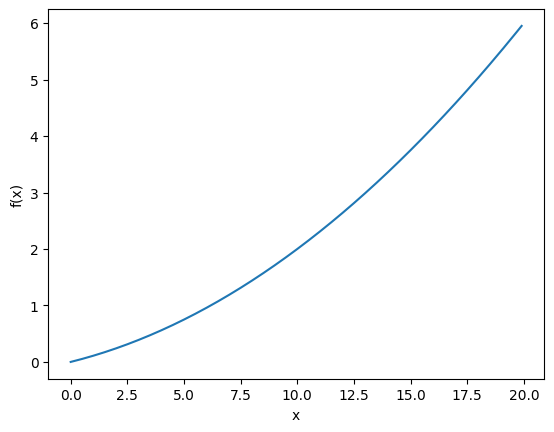

In [19]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [20]:
# x=5 일 때 미분, 0.1999999999990898 / 진정한 미분 값(해석학적) 0.2
print(numerical_diff(function_1, 5))
# x=10 일 때 미분, 0.2999999999986347 / 진정한 미분 값(해석학적) 0.3
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


### 4.3.3 편미분

- **편미분:** 변수가 여럿인 함수에 대한 미분

<img src = "deep_learning_images/e 4.6.png" width = "30%" height = "30%" >

In [21]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)

<img src = "deep_learning_images/fig 4-8.png" width = "50%" height = "50%" >

In [22]:
# x0 = 3, x1 = 4일 때, x0에 대한 편미분을 구하라.
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

print(numerical_diff(function_tmp1, 3.0))
# 6.00000000000378

6.00000000000378


In [23]:
# x0=3, x1=4일 때, x1에 대한 편미분을 구하라.
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

print(numerical_diff(function_tmp2, 4.0))
# 7.999999999999119

7.999999999999119


- 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정.

### 4.4 기울기

- x0과 x1의 편미분을 동시에 계산하고 싶다면?
- **기울기(gradient):** 모든 변수의 편미분을 벡터로 정리한 것

In [24]:
# 기울기 구하기
def numerical_gradient(f, x): # 넘파이 배열 x의 각원소에 대해서 수치 미분 구하기
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같고 그 원소가 모두 0인 배열

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
    
    return grad

In [25]:
print(numerical_gradient(function_2, np.array([3.0,4.0]))) # (3,4) 기울기, 7.999999999999119
print(numerical_gradient(function_2, np.array([0.0,2.0]))) # (0,2) 기울기, 4.000000000004
print(numerical_gradient(function_2, np.array([3.0,0.0]))) # (3,0) 기울기, 0.0

7.999999999999119
4.000000000004
0.0


- 기울기의 결과에 마이너스를 붙인 벡터 그림

<img src = "deep_learning_images/fig 4-9.png" width = "50%" height = "50%" >

- 기울기의 의미
    - 함수의 '가장 낮은 장소(최솟값)'를 가리키는 것 같음 + '가장 낮은 곳'에서 멀어질수록 화살표의 크기가 커짐
    - 기울기는 가장 낮은 장소를 가리키지만, 실제는 반드시 그렇다고 할 수 없다.
    - **기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향**이다.

### 4.4.1 경사법(경사 하강법)

- **경사법(gradient method):** 기울기를 잘 이용해 함수의 최솟값(또는 가능한 한 작은 값)을 찾으려는 것, 함수의 값을 점차 줄이는 것
- BUT, 각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표가 기울기. 가리키는 곳에 정말 함수의 최솟값이 있는지, 정말로 나아갈 방향인지는 보장할 수 없다.

<img src = "deep_learning_images/e 4.7.png" width = "30%" height = "30%" >

- 기호 에타(eta): 갱신하는 양 -> **학습률(learning rate)**
    - 한 번의 학습으로 얼마만큼 학습해야 할지, 즉 매개변수 값을 얼마나 갱신하느냐를 정하는 것이 학습률
- 변수의 값을 갱신하는 단계를 여러 번 반복하면서 서서히 함수의 값을 줄이는 것

In [26]:
# 경사 하강법
# f: 최적화 하려는 함수
# init_x: 초깃값
# lr: 학습률(learning rate)
# step_num: 반복 횟수

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x) # 기울기 구하기
        x -= lr * grad # 갱신: 학습률x기울기
    
    return x

In [27]:
# 경사법으로 f(x0,x1)=(x0^2)+(x1^2)의 최솟값을 구하라
def function_2(x):
    return x[0]**2 + x[1]**2

# 경사 하강법으로 최솟값 구하기
init_x = np.array([-3.0, 4.0]) # 초깃값 설정
print(gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100))
# [-7.00000000e+00  8.12235612e-10] -> 거의 0,0에 가까운 결과

[-7.00000000e+00  8.12235612e-10]


- 경사법에 의한 갱신 과정, 점선은 함수의 등고선을 나타낸다

<img src = "deep_learning_images/fig 4-10.png" width = "50%" height = "50%" >

In [28]:
# 학습률이 너무 크다면? lr=10.0
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100))
# [-1.29504382e+12 -1.29504382e+12] -> 발산

[-1.29504382e+12 -1.29504382e+12]


In [29]:
# 학습률이 너무 작다면? lr=1e-10
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100))
# [-3.00000008  3.99999992] -> 거의 갱신X

[-3.00000008  3.99999992]


> 학습률 같은 매개변수를 **하이퍼파라미터(hyper parameter)**라고 한다. 이는 가중치와 편향과 같은 신경망의 매개변수와는 성질이 다르다. 신경망의 가중치, 편향은 훈련 데이터와 학습 알고리즘에 의해서 '자동'으로 획득되는 매개변수인 반면, 학습률 같은 하이퍼파라미터는 사람이 직접 설정해야 하는 매개변수이다.

### 4.4.2 신경망에서의 기울기

- 신경망 학습에서 기울기 구하기: 가중치 매개변수에 대한 손실함수의 기울기

- 형상 2x3
- 가중치 W
- 손실함수 L

<img src = "deep_learning_images/e 4.8.png" width = "30%" height = "30%" >

- 경사: 각각의 원소에 관한 편미분: 각 원소를 조금 변경했을 때 손실 함수 L이 얼마나 변화하느냐
- 가중치와 경사의 형상 동일: 2x3

In [30]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화 2X3
    
    # 예측
    def predict(self, x):
        return np.dot(x, self.W)

    # 손실 함수의 값
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t) # 정답과 오차

        return loss

In [31]:
net = simpleNet()
print(net.W) # 가중치 매개변수

[[-1.09677253 -0.21046943  0.69282443]
 [ 0.09116778 -0.80885897 -0.6083582 ]]


In [32]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-0.57601252 -0.85425474 -0.13182773]


In [33]:
print(np.argmax(p)) # 최댓값 인덱스

2


In [34]:
t = np.array([0,1,0]) # 정답 레이블

In [35]:
net.loss(x, t)

1.4771011349018117

In [36]:
def f(W):
    return net.loss(x, t)
# f = lambda w: net.loss(x,t)

In [37]:
dW = numerical_gradient(f, net.W) # 다차원 배열 처리 가능하도록 함수 수정.
print(dW)

[[ 0.1809227  -0.46302074  0.28209804]
 [ 0.27138405 -0.6945311   0.42314705]]


- w11을 h만큼 늘리면 -> 손실 함수의 값은 0.02만큼 증가
- w22을 h만큼 늘리면 -> 손실 한수의 값은 0.09만큼 감소
- 손실 함수를 줄인다는 관점에서 w00은 음의 방향으로 갱신 / w11은 양의 방향으로 갱신

## 4.5 학습 알고리즘 구현하기

- 신경망 학습의 절차
    - 전제:<br/>신경망에는 적용 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 한다. 신경망 학습은 다음과 같이 4단계로 수행한다.
        
    1. 미니배치:<br/> 훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표다.
    <br/> **-> 확률적 경사 하강법(stochastic gradient descent, SGD)**
    2. 기울기 산출:<br/> 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.
    3. 매개변수 갱신:<br/> 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.
    4. 반복:<br/> 1 ~ 3단계를 반복한다.

### 4.5.1 2층 신경망 클래스 구현하기

In [41]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

# 2층 신경망 클래스 TwoLayerNet
class TwoLayerNet:
    # 초기화 수행
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        
        # 가중치 초기화: 정규분포 난수, 편향은 0으로
        self.params = {} # 매개변수 보관 딕셔너리
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    
    # 예측(추론) 수행
    def predict(self, x):
        
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # 손실 함수의 값 구하기: predict()의 결과와 정답 레이블을 바탕으로 교차 엔트로피 오차
    # x: 입력 데이터, t: 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    # 정확도 구하기
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    # 가중치 매개변수의 기울기 구하기(수치 미분 방식) / 고속(오차역전파법)
    # x: 입력 데이터, t: 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {} # 기울기 보관 딕셔너리 
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [42]:
# params -> 가중치 매개변수 저장
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape) # (784, 100)
print(net.params['b1'].shape) # (100,)
print(net.params['W2'].shape) # (100, 10)
print(net.params['b2'].shape) # (10,)

(784, 100)
(100,)
(100, 10)
(10,)


In [56]:
# 예측처리(순방향 처리)에 사용
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
y = net.predict(x)
y

array([[0.09753395, 0.09413259, 0.10299772, 0.10052944, 0.10504186,
        0.10068374, 0.09883676, 0.10504423, 0.09510377, 0.10009595],
       [0.09764982, 0.09449404, 0.10307961, 0.100513  , 0.10477806,
        0.10036883, 0.09904291, 0.10515957, 0.09498776, 0.09992638],
       [0.09785843, 0.09456273, 0.10305851, 0.10038981, 0.10425921,
        0.1002804 , 0.09916164, 0.10521567, 0.09529394, 0.09991966],
       [0.09709031, 0.09470631, 0.10311594, 0.1005091 , 0.10464903,
        0.10047443, 0.0992642 , 0.10515632, 0.09499112, 0.10004325],
       [0.09784577, 0.09448052, 0.10325864, 0.10054253, 0.10414802,
        0.10077648, 0.09901845, 0.10482894, 0.09527958, 0.09982106],
       [0.0974045 , 0.09438032, 0.10287977, 0.10031865, 0.10460088,
        0.10089077, 0.09906721, 0.10520975, 0.09538221, 0.09986593],
       [0.09804975, 0.09454829, 0.10262466, 0.10037515, 0.10462443,
        0.10038483, 0.09907872, 0.10513959, 0.09526516, 0.09990944],
       [0.09762769, 0.09478656, 0.1033929

In [ ]:
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
t = np.random.rand(100, 10) # 더미 정답 레이블(100장 분량)

grads = net.numerical_gradient(x, t) # 기울기 계산

print(grads['W1'].shape) # (784, 100)
print(grads['b1'].shape) # (100, )
print(grads['W2'].shape) # (100, 10)
print(grads['b2'].shape) # (10, )

### 4.5.2 미니배치 학습 구현하기

In [ ]:
import numpy as np
from dataset.mnist import load_mnist
# from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 성능 개선판!
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    print(i) # 확인용

- 손실 함수 값의 추이: 왼쪽 10,000회 반복 까지, 오른쪽 1,000회 반복까지

<img src = "deep_learning_images/fig 4-11.png" width = "70%" height = "70%" >

### 4.5.3 시험 데이터로 평가하기

- 손실 함수의 값이 작아지는 것은 신경망이 잘 학습하고 있다는 방증, but '오버피팅' 확인
- 훈련 외의 데이터를 올바르게 인식하는지 확인
- '범용'적인 능력 
- 1에폭(epoch) 별로 훈련 데이터와 시험 데이터에 대한 정확도 기록

In [ ]:
import numpy as np
from dataset.mnist import load_mnist
# from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

train_loss_list = []
# 에폭 리스트 추가
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수(10,000 / 100 -> 100회)
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 성능 개선판!

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0: # 100번 마다(1에폭 마다)
        
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


- 훈련 데이터와 시험 데이터에 대한 정확도 추이

<img src = "deep_learning_images/fig 4-12.png" width = "60%" height = "60%" >

- 에폭이 진행될수록(학습이 진행될수록) 훈련 데이터와 시험 데이터를 사용하고 평가한 정확도가 모두 좋아지고 있다. + 두 정확도 차이가X(선 겹침) -> 오버피팅이 일어나지 않았다.

## 4.6 정리

- 신경망 학습
- '지표': 손실 함수
- 신경망 학습의 목표: 손실 함수를 기준으로 그 값이 가장 작아지는 가중치 매개변수 값을 찾아내는 것
- 찾는 수법: 경사법(함수의 기울기 이용)

> **이번 장에서 배운 내용**
* 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험 데이터로 나눠 사용한다.
* 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가한다.
* 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신한다.
* 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복한다.
* 아주 작은 값을 주었을 때의 차분으로 미분하는 것을 수치 미분이라고 한다.
* 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.
* 수치 미분을 이용한 계산에는 시간이 걸리지만, 그 구현은 간단하다. 한편, 다음 장에서 구현하는 (다소 복잡한) 오차역전파법은 기울기를 고속으로 구할 수 있다.